In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import os
import re
import codecs
from IPython.display import display, Math
from IPython.display import Image as ipImage
from six.moves import cPickle as pickle
import string
from PIL import Image
import numpy as np
import h5py
import sys
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
width = None
pd.options.display.max_rows = 200
pd.options.display.max_columns = width
pd.options.display.max_colwidth = -1
pd.options.display.width = -1
pd.options.display.max_seq_items = None
pd.options.display.expand_frame_repr = False
pd.options.display.colheader_justify = 'left'

In [4]:
sys.path.extend(['../commons'])
import data_commons as dtc
import dl_commons as dlc
import viz_commons as vc
from viz_commons import VisualizeDir, DiffParams, VisualizeStep

Using TensorFlow backend.


In [5]:
# vd = VisualizeDir(os.path.expanduser('/zpool_3TB/i2l/tb_metrics/2017-12-21 02-20-10 PST 140K_score_89.0/store'))
# vd = VisualizeDir(os.path.expanduser('/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/store_2'))
# vd = VisualizeDir(os.path.expanduser('/zpool_3TB/i2l/tb_metrics/2017-12-16 18-51-38 PST pLambda=0_score_88.86/store'))
# vd1 = VisualizeDir('/zpool_3TB/i2l/tb_metrics/2017-12-16 18-51-38 PST pLambda=0_score_88.86/test_runs/step_00132200_score88.19_publish/store_2')
vd = VisualizeDir('/zpool_3TB/i2l/tb_metrics/2017-12-21 02-20-10 PST 140K_score_89.0/test_runs/step_00168100_temp/store')
# vd3 = VisualizeDir('/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2')

In [6]:
vd.hyper['CALSTM_STACK'][0]['decoder_lstm']

{'B': 28,
 'dropout': None,
 'dtype': tf.float32,
 'forget_bias': 1.0,
 'i': 2112,
 'layers_units': [1500, 1500],
 'op_name': 'LSTMWrapper',
 'tb': {'tb_activations': 'Activations',
  'tb_biases': 'Biases',
  'tb_logdir': '/zpool_3TB/i2l/tb_metrics/2017-12-21 02-20-10 PST 140K_score_89.0/test_runs',
  'tb_weights': 'Weights'},
 'type': 'lstm',
 'use_peephole': True,
 'weights_initializer': <function tensorflow.contrib.layers.python.layers.initializers._initializer>,
 'weights_regularizer': <function tensorflow.contrib.layers.python.layers.regularizers.l2>}

In [7]:
vd.view_snapshots()

Num Snapshots: 1
Snapshots = [(168100, 147087.5)]


In [8]:
ms = VisualizeStep(vd, 'metrics_validation', 168100)
ms.keys()

[u'accuracy',
 u'bleu',
 u'bleu2',
 u'bok_accuracy',
 u'bok_bleu',
 u'bok_bleu2',
 u'bok_edit_distance',
 u'edit_distance',
 u'num_hits']

In [12]:
print(ms.nd('bok_edit_distance'))
print(ms.nd('edit_distance'))

metrics_validation
[ 0.04998777]
metrics_validation
[ 0.06767473]


In [ ]:
#vs = VisualizeStep(vd, 'test', 167526)
vs = VisualizeStep(vd, 'validation', 168100)
df_strs = vs.strs( 'y', 'predicted_ids', trim=True, wrap_strs=True)
df_strs

In [12]:
vs.keys()

[u'alpha',
 u'beta',
 u'bleu',
 u'bok_bleu',
 u'bok_ids',
 u'ed',
 u'image_name',
 u'predicted_ids',
 u'y']

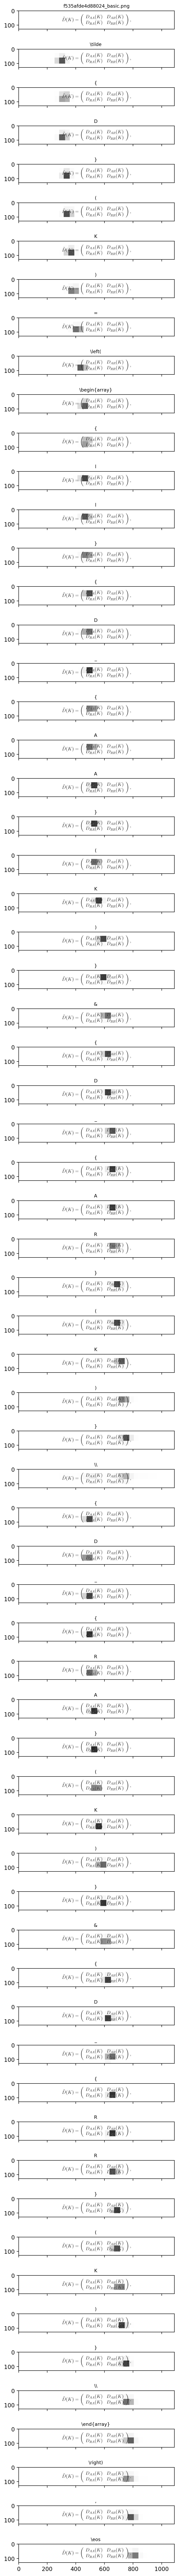

In [23]:
nd_alpha = vs.alpha(2, invert_alpha=True, gamma_correction=1, cmap='gist_gray')  # gist_gray, gist_yarg, gist_heat
# nd_alpha = vs.alpha(9, invert_alpha=False, gamma_correction=2.3, cmap='gist_yarg')

In [ ]:
# num_hits = df_strs[df_strs.edit_distance == 0].count()[0]
# df_strs.count()
# df_hits = df_strs.iloc[0:num_hits-1].sort_values(by=['len'], ascending=False)